In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150

In [2]:
import numpy as np

In [3]:
import kplr

# Tim Bedding say: Try KIC 6779699
kicnum = 6779699
kicstr = "KIC {}".format(kicnum)
client = kplr.API()
star = client.star(kicnum)

# Download the lightcurves for this KOI.
lcs = star.get_light_curves()

In [4]:
# Loop over the datasets and read in the data.
x, y, yerr = [], [], []
for lc in lcs:
    with lc.open() as f:
        print(lc.filename)
        # The lightcurve data are in the first FITS HDU.
        data = f[1].data
        x0 = data["TIME"]
        y0 = data["PDCSAP_FLUX"]
        m = (data["SAP_QUALITY"] == 0) & np.isfinite(x0) & np.isfinite(y0)
        x.append(x0[m])
        mu = np.median(y0[m])
        y.append((y0[m] / mu - 1.0) * 1e6)
        yerr.append(1e6 * data["PDCSAP_FLUX_ERR"][m] / mu)
time = np.concatenate(x)
flux = np.concatenate(y)
ferr = np.concatenate(yerr)

# BUG: NEED TO FILTER OUT LOW FREQUENCY SHIT HERE.        
# time, flux, ferr, quality = np.array([]), np.array([]), np.array([]), np.array([])
# for lc in lcs:
#     with lc.open() as f:
#         print(lc.filename)
#         # The lightcurve data are in the first FITS HDU.
#         hdu_data = f[1].data
#         time = np.append(time, hdu_data["time"])
#         thisflux = hdu_data["sap_flux"]
#         bad = np.logical_not(np.isfinite(thisflux))
#         thisflux[bad] = 1.
#         medflux = np.median(thisflux)
#         thisflux[bad] = medflux
#         flux = np.append(flux, thisflux / medflux - 1.)
#         thisferr = hdu_data["sap_flux_err"] / medflux
#         thisferr[bad] = np.Inf
#         ferr = np.append(ferr, thisferr)
#         quality = np.append(quality, hdu_data["sap_quality"])
# good = np.isfinite(time) * np.isfinite(flux) * np.isfinite(ferr)
# time = time[good]
# flux = flux[good]
# ferr = ferr[good]
# quality = quality[good]

/Users/dfm/.kplr/data/lightcurves/006779699/kplr006779699-2009131105131_llc.fits
/Users/dfm/.kplr/data/lightcurves/006779699/kplr006779699-2009166043257_llc.fits
/Users/dfm/.kplr/data/lightcurves/006779699/kplr006779699-2009259160929_llc.fits
/Users/dfm/.kplr/data/lightcurves/006779699/kplr006779699-2009350155506_llc.fits
/Users/dfm/.kplr/data/lightcurves/006779699/kplr006779699-2010078095331_llc.fits
/Users/dfm/.kplr/data/lightcurves/006779699/kplr006779699-2010174085026_llc.fits
/Users/dfm/.kplr/data/lightcurves/006779699/kplr006779699-2010265121752_llc.fits
/Users/dfm/.kplr/data/lightcurves/006779699/kplr006779699-2010355172524_llc.fits
/Users/dfm/.kplr/data/lightcurves/006779699/kplr006779699-2011073133259_llc.fits
/Users/dfm/.kplr/data/lightcurves/006779699/kplr006779699-2011177032512_llc.fits
/Users/dfm/.kplr/data/lightcurves/006779699/kplr006779699-2011271113734_llc.fits
/Users/dfm/.kplr/data/lightcurves/006779699/kplr006779699-2012004120508_llc.fits
/Users/dfm/.kplr/data/lightc

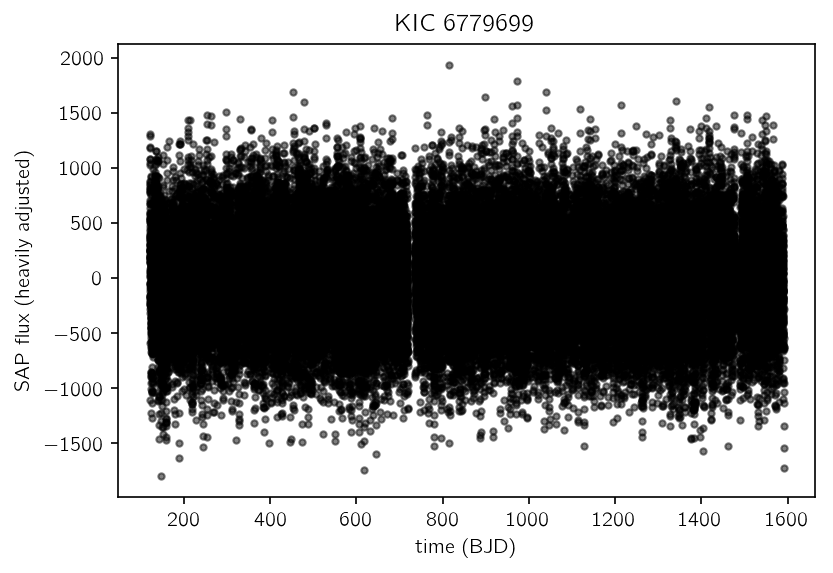

In [5]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(time, flux, "k.", alpha=0.5)
plt.xlabel("time (BJD)")
plt.ylabel("SAP flux (heavily adjusted)")
plt.title(kicstr)

In [6]:
from astropy.stats import LombScargle
frequency, power = LombScargle(time, flux).autopower()
print(frequency, power)

[  6.80058231e-05   2.04017469e-04   3.40029116e-04 ...,   9.61768953e+01
   9.61770313e+01   9.61771673e+01] [  2.23542884e-05   1.90964147e-05   1.33078148e-05 ...,   2.99919978e-04
   2.66594067e-04   2.01157108e-04]


(0, 20)

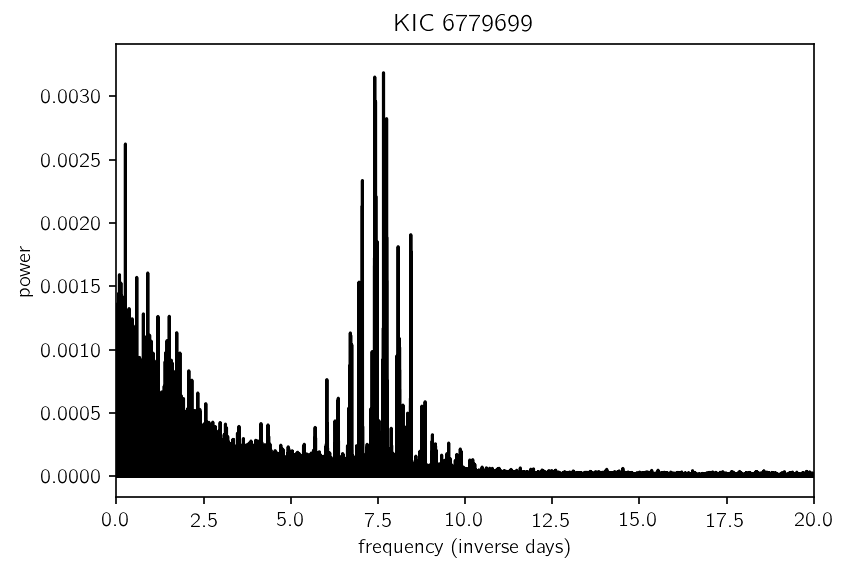

In [7]:
# Why does this plot look like crap? - looks better now...
plt.clf()
plt.plot(frequency, power, "k")
plt.xlabel("frequency (inverse days)")
plt.ylabel("power")
plt.title(kicstr)
plt.xlim(0, 20)
# plt.xlim(0., 0.02)

In [8]:
fmax = frequency[np.argmax(power * (frequency < 0.02))]
omega = 2. * np.pi * fmax
fmax, omega
fmax = frequency[np.argmax(power * (frequency < 0.02) * (frequency > 0.009))]
omegas = (omega, 2. * np.pi * fmax)
omegas

(0.092722621909726854, 0.092722621909726854)